# Reading external data & Plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv('data/btc-market-price.csv')
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [8]:
df = pd.read_csv('data/btc-market-price.csv', header=None)
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [10]:
df.columns = ['Timestamp', 'Price']
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [11]:
df.shape

(365, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [13]:
df.tail()

,Timestamp,Price
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [14]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [15]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [18]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [19]:
df.set_index('Timestamp', inplace=True)

In [20]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [22]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

.


# Putting evetything together
And now, we've finally arrived to the final, desired version of the DataFrame parsed from our CSV file. The steps were:

In [23]:
df = pd.read_csv('data/btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


So we can do it in the one line:

In [25]:
df = pd.read_csv(
    'data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


.


### Plotting basics
__pandas__ integrates with __Matplotlib__ and creatin a plot is as simple as:

<AxesSubplot:xlabel='Timestamp'>

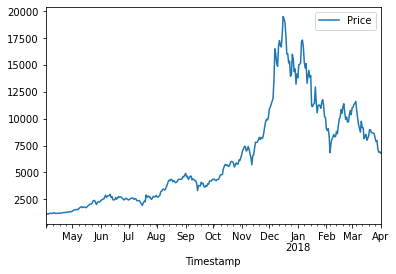

In [26]:
df.plot()

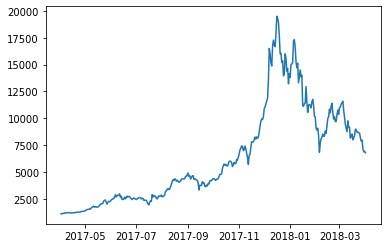

In [27]:
plt.plot(df.index, df['Price'])

In [28]:
x = np.arange(-10, 11)

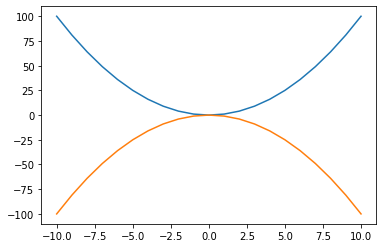

In [29]:
plt.plot(x, x**2)
plt.plot(x, -1 * (x ** 2))

Each __plt__ function alters the global stae is you want to set settings of you plot you can use the __plt.figure__ function. Others like __plt.title__ keep altering the golobal plot:

Text(0.5, 1.0, 'My Nice Plot')

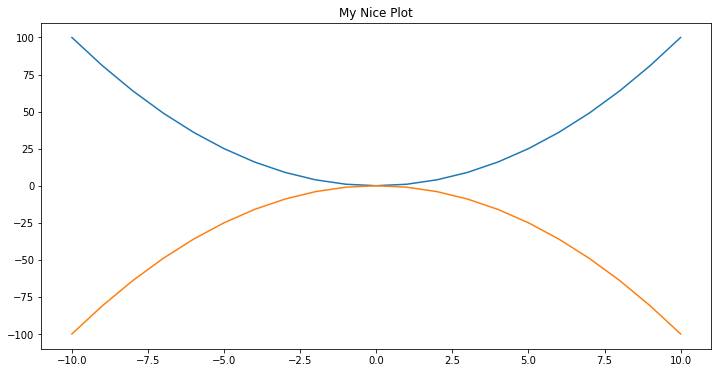

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(x, x**2)
plt.plot(x, -1 * (x**2))

plt.title('My Nice Plot')

<AxesSubplot:title={'center':'Bitchcoin Price 2017-2018'}, xlabel='Timestamp'>

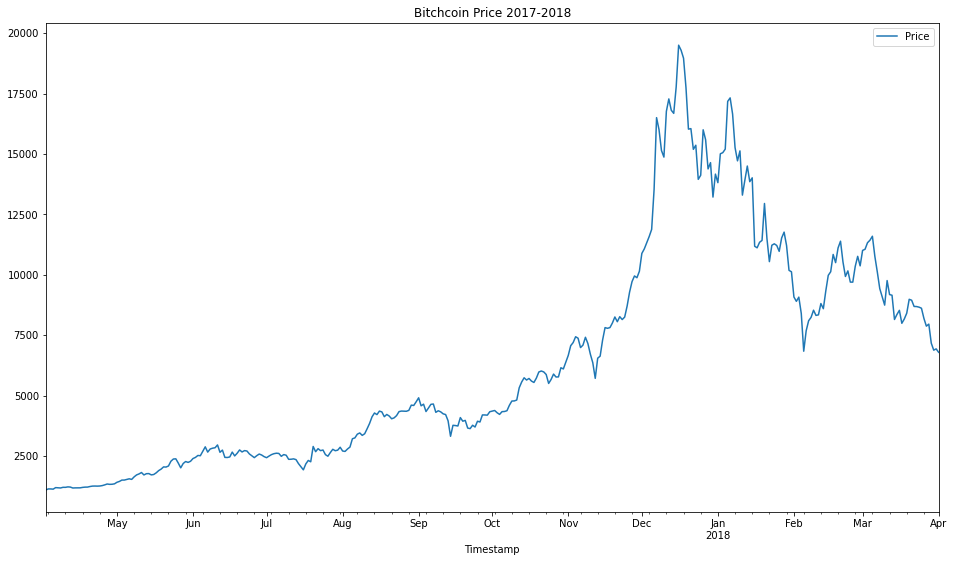

In [33]:
df.plot(figsize=(16, 9), title='Bitchcoin Price 2017-2018')

.


### A more challenging parsing

In [51]:
eth = pd.read_csv('data/eth-price.csv')
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [52]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True)

print(eth.dtypes)
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [53]:
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

In [54]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [57]:
pd.read_csv('data/eth-price.csv', parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


In [58]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())

eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


In [59]:
prices = pd.DataFrame(index=df.index)

prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [60]:
prices['Bitchcoin'] = df['Price']
prices['Ether'] = eth['Value']

prices.head()

,Bitchcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

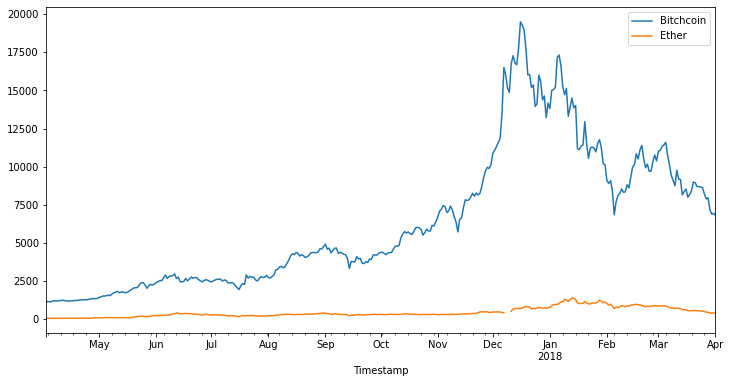

In [61]:
prices.plot(figsize=(12, 6))

<AxesSubplot:xlabel='Timestamp'>

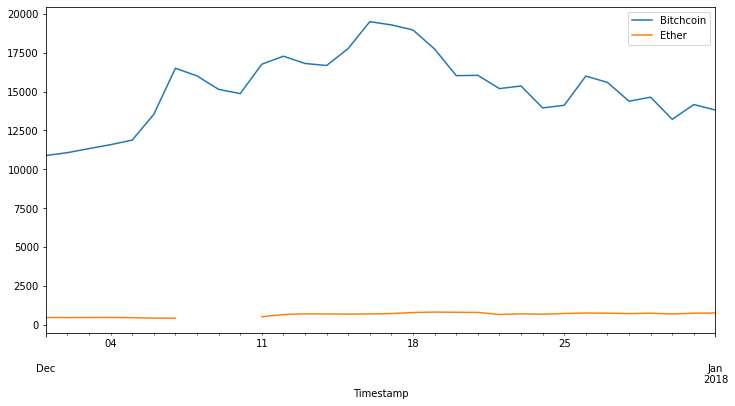

In [62]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12, 6))

In [ ]:
data_pca.to_csv